<a href="https://colab.research.google.com/github/JesusPenha/Electronica_Potencia/blob/main/Controlled_Full_Wave_Rectifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Controlled full wave rectifier

In this script, we implement a controlled Full Wave Rectifier model.

$$i_o(\omega t) = \frac{V_m}{Z} \left[ \sin (\omega t - \theta) - \sin (\alpha - \theta) e^{(\alpha - \omega t)/\omega \tau} \right]$$

In [1]:
import numpy as np
import matplotlib.pylab as plt

#  Discontinuous mode

In [2]:
Vs = 120         # Generator voltage
fs = 60          # Generator frequency
alpha = 60*np.pi/180.0  # Trigger angle
R = 10  # Resistive load
L = 20e-3 # Inductance load
w = 2*np.pi*60 # frequency

Vm = np.sqrt(2)*Vs
Z = np.sqrt(R**2 + (w*L)**2)
theta = np.arctan(w*L/R)
wT = w*L/R

A = -(Vm/Z)*np.sin(alpha - theta)*np.exp(alpha/wT)

In [3]:
wt = np.linspace(0,2*np.pi, 1000)

io = (Vm/Z)*np.sin(wt-theta) + A*np.exp(-wt/wT)
Vswt = Vm*np.sin(wt)

## Solving Beta value

In [4]:
from scipy.optimize import fsolve

func = lambda beta : (Vm/Z)*np.sin(beta-theta) - np.sin(alpha -theta)*np.exp((alpha-beta)/wT) 

beta_initial_guess = np.pi + alpha
beta_sol = fsolve(func, beta_initial_guess)
print ("Beta is : %f" % beta_sol) 

Beta is : 3.786876


In [5]:
N = len(io)
io_sol = np.zeros(N)
Vo = np.zeros(N)

for i in range(N):
    if wt[i] <= beta_sol and wt[i] >= alpha:
        io_sol[i] = io[i]
        
for j in range(N):
    n = wt[j]//3.14
    if wt[j] <= np.pi*(n+1) and wt[j] >= alpha + np.pi*(n):
        Vo[j] = np.abs(Vm*np.sin(wt[j]))

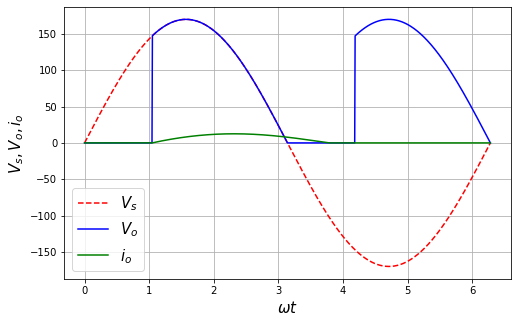

In [6]:
plt.figure(figsize=(8,5))
plt.plot(wt, Vswt, '--r', label='$V_s$')
plt.plot(wt, Vo, 'b', label='$V_o$')
plt.plot(wt, io_sol, 'g', label='$i_o$')
plt.xlabel("$\omega t$", fontsize=15)
plt.ylabel("$V_s, V_o, i_o$", fontsize=15)
plt.legend(fontsize=15)
plt.grid()
